## Loan Classification - VemQuitar

You recently got a job as a machine learning scientist at a startup that wants to automate loan approvals. As your first project, your manager would like you to build a classifier to predict whether a loan will be paid back based on this data.
There are two things to note. First, there is class imbalance; there are fewer examples of loans not fully paid. Second, it's more important to accurately predict whether a loan will not be paid back rather than if a loan is paid back. Your manager will want to know how you accounted for this in training and evaluation your model.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

| Nome da Coluna         | Nome em Português       | Tipo de Dado   | Descrição                                                       | Valores Possíveis  |
|------------------------|-------------------------|----------------|------------------------------------------------------------------|--------------------|
| credit_policy          | Política de Crédito     | int (binário)  | 1 se o cliente atende aos critérios de crédito; 0 caso contrário.| 0, 1             |
| purpose                | Propósito               | string (qualit)| O propósito do empréstimo.                                       | Texto            |
| int_rate               | Taxa de Juros           | float (quanti) | Taxa de juros do empréstimo, mais arriscados tem taxas mais altas | 0.6 ~ 22.0%   |
| installment            | Parcela                 | float (quanti)  | Parcelas/mês devidas pelo mutuário se o empréstimo for aprovado     | $15.670 – $940.140 |
| log_annual_inc         | Log Renda Anual         | float (quanti)  | Logaritmo natural da renda anual autodeclarada do mutuário.          | $7.547 - 14.528     |
| dti                    | Razão Dívida/Renda      | float (quanti)  | Razão entre dívida e renda do mutuário.                              | 0.0 – 29.96     |
| fico                   | Score FICO              | int (quanti)    | Pontuação de crédito FICO do mutuário.                                   | 612 – 827        |
| days_with_cr_line      | Dias c/Linha de Crédito | int (quanti)    | Número de dias que o mutuário possui uma linha de crédito.             | 178 - 17.639   |
| revol_bal              | Saldo Revolvente        | float (quanti)  | Saldo pendente no fim do ciclo de faturamento do cartão de crédito| $0.00 – $1.207.359 |
| revol_util             | Uso do Crédito          | float (quanti)  | Taxa de utilização do crédito rotativo (uso do crédito disponível).    | 0.0 – 119.00     |
| inq_last_6mths         | Consultas Último 6m     | int (quanti)    | Número de consultas ao crédito feitas por credores nos últimos 6 meses. | 0 – 33         |
| delinq_2yrs            | Atrasos Últimos 2 Anos  | int (quanti)    | Número de vezes que o mutuário ficou 30+ dias em atraso nos últimos 2 anos. | 0 – 13      |
| pub_rec                | Registros Públicos      | int (quanti)    | Número de registros públicos negativos do mutuário.                     | 0 – 5          |
| not_fully_paid         | Empréstimo Não Pago     | int (binário)   | 1 se o empréstimo não foi totalmente pago; 0 caso contrário.             | 0, 1             |

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [168]:
df_VemQuitar= pd.read_csv('../data/loan_data.csv')

df_VemQuitar.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Tratamento e análise dos dados  

In [ ]:
df_VemQuitar.info()
# Não possui valores nulos

In [ ]:
df_VemQuitar.describe()

| Nome da Coluna         | Nome em Português       | Tipo de Dado  | Descrição                                                       | Valores Possíveis  |
|------------------------|-------------------------|---------------|-----------------------------------------------------------------|--------------------|
| credit_policy          | Política de Crédito     | int (binário)  | 1 se o cliente atende aos critérios de crédito; 0 caso contrário.| 0, 1             |
| purpose                | Propósito               | string (qualit) | O propósito do empréstimo.                                     | Texto            |
| int_rate               | Taxa de Juros           | float (quanti)| Taxa de juros do empréstimo, mais arriscados tem taxas mais altas | 0.6 ~ 22.0%   |
| installment        | Parcela               | float (quanti)  | Parcelas/mês devidas pelo mutuário se o empréstimo for aprovado     | $15.670 – $940.140 |
| log_annual_inc     | Log Renda Anual       | float (quanti)  | Logaritmo natural da renda anual autodeclarada do mutuário.          | Número real      |
| dti               | Razão Dívida/Renda     | float (quanti)  | Razão entre dívida e renda do mutuário.                              | 0.0 – 29.96     |
| fico              | Score FICO             | int (quanti)  | Pontuação de crédito FICO do mutuário.                                   | 612 – 827        |
| days_with_cr_line | Dias com Linha de Crédito | int (quanti) | Número de dias que o mutuário possui uma linha de crédito.             | Número inteiro   |
| revol_bal         | Saldo Revolvente       | float (quanti)  | Saldo pendente no fim do ciclo de faturamento do cartão de crédito| $0.00 – $1.207.359 |
| revol_util        | Uso do Crédito         | float (quanti)  | Taxa de utilização do crédito rotativo (uso do crédito disponível).    | 0.0 – 119.00     |
| inq_last_6mths    | Consultas Últimos 6 Meses | int (quanti) | Número de consultas ao crédito feitas por credores nos últimos 6 meses. | 0 – 33         |
| delinq_2yrs       | Atrasos Últimos 2 Anos | int (quanti) | Número de vezes que o mutuário ficou 30+ dias em atraso nos últimos 2 anos. | 0 – 13      |
| pub_rec           | Registros Públicos     | int (quanti) | Número de registros públicos negativos do mutuário.                     | 0 – 5          |
| not_fully_paid    | Empréstimo Não Pago    | int (binário) | 1 se o empréstimo não foi totalmente pago; 0 caso contrário.             | 0, 1             |

In [ ]:
df_VemQuitar.duplicated().sum()

# Não tem valores duplicados

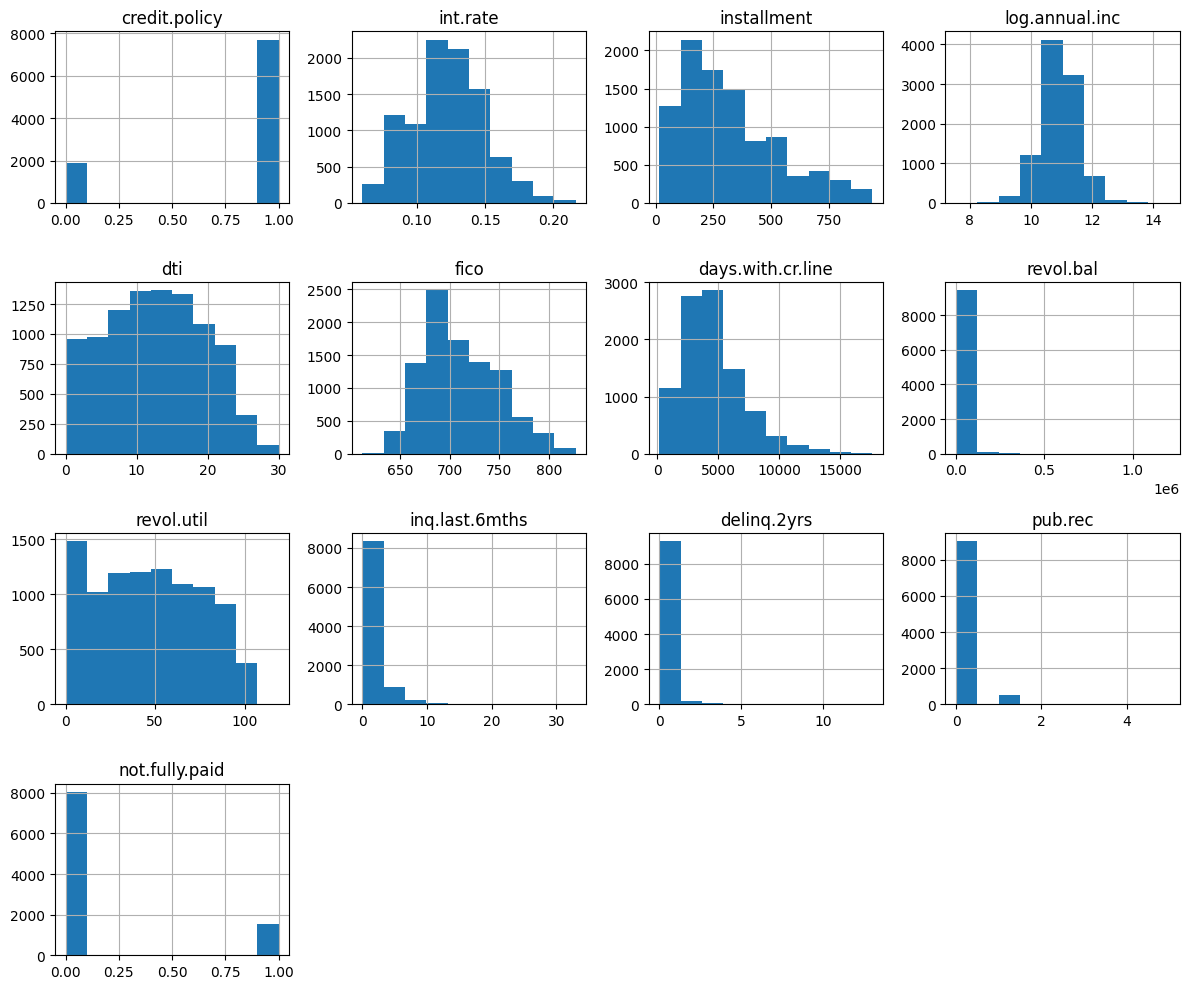

In [169]:
df_VemQuitar.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Payments vs Non-Payments')

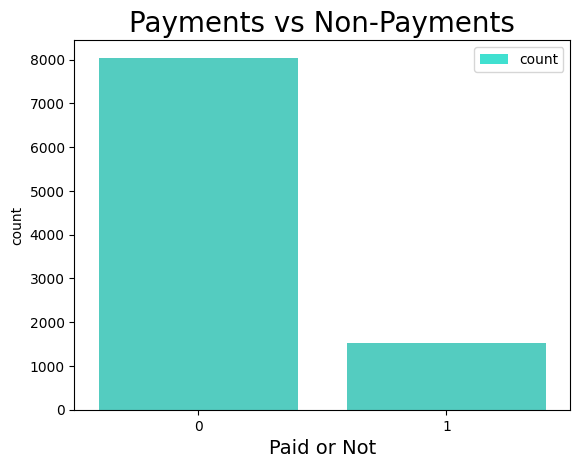

In [170]:
df_VemQuitar['not.fully.paid'].value_counts().plot(kind='bar', color='#40E0D0')
sns.countplot(x='not.fully.paid', color= '#40E0D0', data=df_VemQuitar)
plt.xlabel('Paid or Not', fontsize=14)
plt.xticks(rotation=0)
plt.title('Payments vs Non-Payments', size=20)

#### Observando o gráfico, vemos que o número de pessoas que pagaram o empréstimo que tomaram foi maior do que quando comparado aos que não pagaram. 

-------------------------------------------------------------------------------------------------

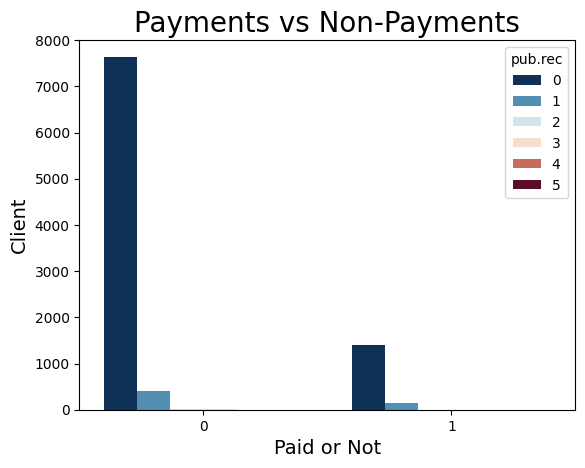

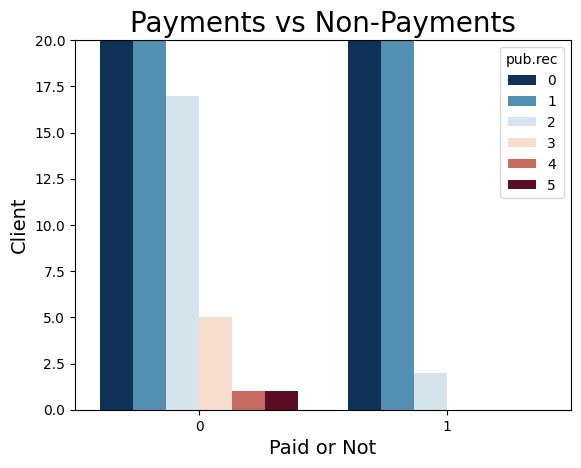

In [171]:
sns.countplot(x='not.fully.paid', hue='pub.rec', data=df_VemQuitar, palette='RdBu_r')
plt.xlabel('Paid or Not', fontsize=14)
plt.ylabel('Client', fontsize=14)  # Modificando o nome do eixo Y
plt.xticks(rotation=0)
plt.ylim(0, 8000)
plt.title('Payments vs Non-Payments', fontsize=20)
plt.show()

sns.countplot(x='not.fully.paid', hue='pub.rec', data=df_VemQuitar, palette='RdBu_r')
plt.xlabel('Paid or Not', fontsize=14)
plt.ylabel('Client', fontsize=14)  # Modificando o nome do eixo Y
plt.xticks(rotation=0)
plt.ylim(0, 20)
plt.title('Payments vs Non-Payments', fontsize=20)
plt.show()


#### Ao observar o primeiro gráfico podemos inquirir que a quantidade de bons pagadores pode está diretamente ligado a quantidade de número de registros públicos negativos, visto que a maioria dos bons pagadores não possuem registros negativos em seu nome. Entretanto, existe ainda um número de credores que pagaram seus empréstimos porém, eles tem 3 ou mais registros negativos no nome, bem como existem maus pagadores, que não finalizaram o pagamento dos seus empréstimos, que não obtinham registros negativos em seu nome. E é para mitigar esses números que esse estudo continua a seguir.  
---------------------------------------------------

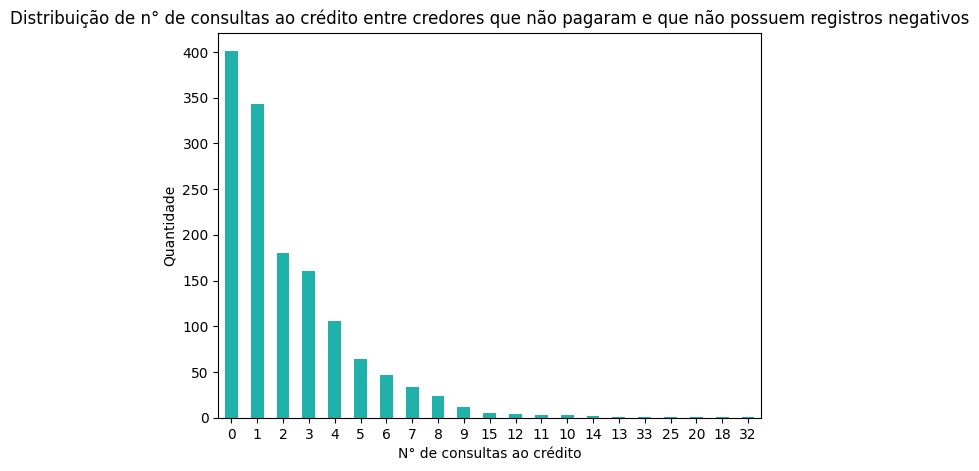

In [172]:
filtered_df = df_VemQuitar[(df_VemQuitar["not.fully.paid"] == 1) & (df_VemQuitar["pub.rec"] == 0)]

inq_counts = filtered_df["inq.last.6mths"].value_counts()

plt.figure(figsize=(7, 5))
inq_counts.plot(kind="bar", color="lightseagreen")
plt.xlabel("N° de consultas ao crédito")
plt.xticks(rotation=0)
plt.ylabel("Quantidade")
plt.title("Distribuição de n° de consultas ao crédito entre credores que não pagaram e que não possuem registros negativos")
plt.show()

#### Podemos observar dentre os não pagadores que apesar deles não terem registros negativos, muitos já tinham tentando outras linhas de crédito ao ponto de terem seus registros pesquisados nos últimos 6 meses. 

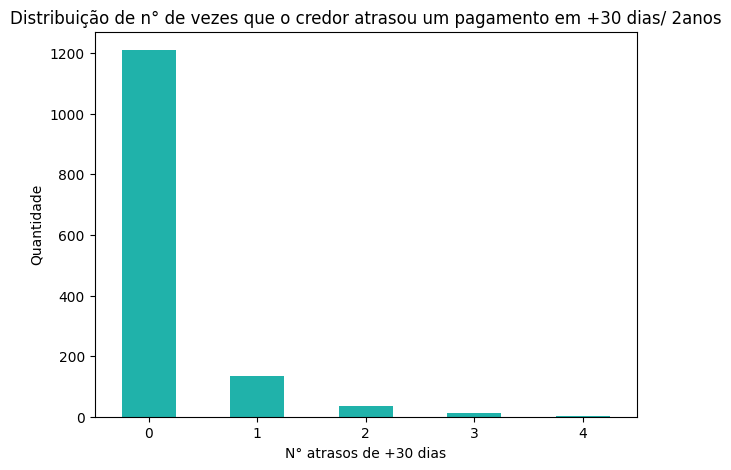

In [173]:
filtered_df = df_VemQuitar[(df_VemQuitar["not.fully.paid"] == 1) & (df_VemQuitar["pub.rec"] == 0)]
inq_counts = filtered_df["delinq.2yrs"].value_counts()
plt.figure(figsize=(7, 5))
inq_counts.plot(kind="bar", color="lightseagreen")


plt.xlabel("N° atrasos de +30 dias")
plt.xticks(rotation=0)
plt.ylabel("Quantidade")
plt.title("Distribuição de n° de vezes que o credor atrasou um pagamento em +30 dias/ 2anos")
plt.show()



In [174]:
novos_maus_pagadores = df_VemQuitar[(df_VemQuitar["not.fully.paid"] == 1) & (df_VemQuitar["pub.rec"] == 0) & (df_VemQuitar["delinq.2yrs"]==0)].value_counts()
aux = len(novos_maus_pagadores)
aux

1210

#### Cerca de 1210 credores estavam totalmente fora do radar da inadimplência pois, não tinham registros negatvos em seu nome e dentre 2 anos não tinham atrasados contas com mais de 30 dias, tornando difícil o reconhecimento de padrões ruins dificultando assim uma possível negativa de empréstimo. 
--------------------------------------- 

not.fully.paid                1.000000
int.rate                      0.159552
inq.last.6mths                0.149452
purpose_small_business        0.084460
revol.util                    0.082088
revol.bal                     0.053699
installment                   0.049955
pub.rec                       0.048634
dti                           0.037362
purpose_educational           0.021609
delinq.2yrs                   0.008881
purpose_home_improvement      0.007272
purpose_debt_consolidation   -0.017543
purpose_major_purchase       -0.028580
days.with.cr.line            -0.029237
log.annual.inc               -0.033439
purpose_credit_card          -0.047136
fico                         -0.149666
credit.policy                -0.158119
Name: not.fully.paid, dtype: float64


C:\Users\isabel_martins\AppData\Local\Temp\ipykernel_20188\4018242581.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacao_e_alvo.values, y=correlacao_e_alvo.index, palette='coolwarm')


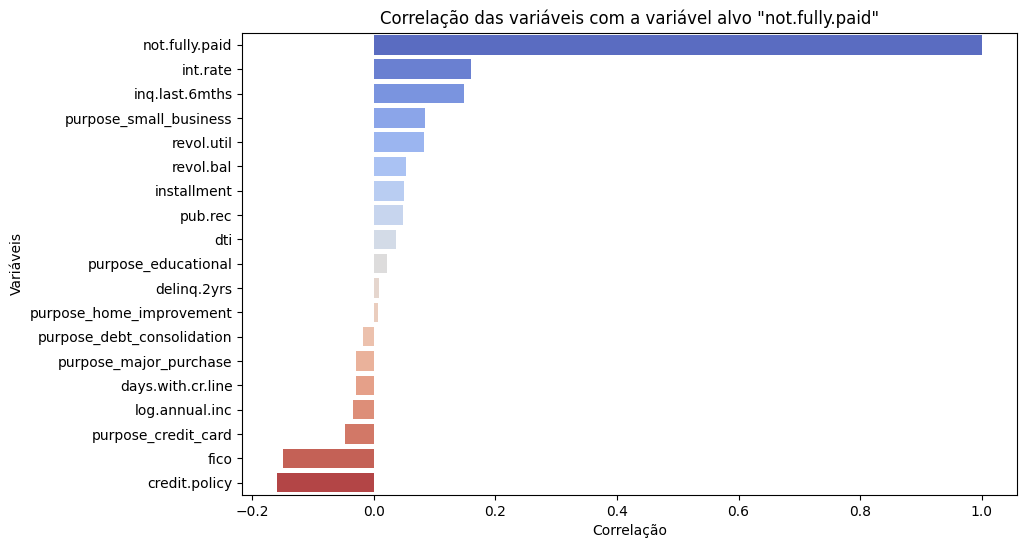

In [175]:
df_VemQuitar = pd.get_dummies(df_VemQuitar, columns=['purpose'], drop_first=True)

correlacao = df_VemQuitar.corr()
correlacao_e_alvo = correlacao['not.fully.paid'].sort_values(ascending=False)

print(correlacao_e_alvo)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlacao_e_alvo.values, y=correlacao_e_alvo.index, palette='coolwarm')
plt.title('Correlação das variáveis com a variável alvo "not.fully.paid"')
plt.xlabel('Correlação')
plt.ylabel('Variáveis')
plt.show()


#### Apesar das variáveis não apresentarem correlações fortes, é preciso analisar com mais cautela a utilidade para a regressão logistica. 

# Building a Logistic Regression model

## Train Test Split

In [ ]:
# Com os estudos ficou uma dúvida se eu retirava as features antes ou se eu deixava o modelo selecionar as melhores features para o treino. Na dúvida, fiz dos dois jeitos. 

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE, SelectKBest, f_classif

In [177]:
X = df_VemQuitar.drop(columns=['not.fully.paid']) 
y = df_VemQuitar['not.fully.paid']  # Variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y) # valores vistos no curso

scaler = StandardScaler() # É preciso padronizar para depois selecionar
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n=== VERSÃO 1: Seleção de Features APÓS Treinamento ===")

# Treinamento inicial 
todas_features = LogisticRegression()
todas_features.fit(X_train_scaled, y_train)

#feature_importante = pd.Series(abs(todas_features.coef_[0]), index=X.columns).sort_values(ascending=False)
#print("Importância das Features:\n", feature_importante)

selecao_features = RFE(LogisticRegression(), n_features_to_select=5) # 5 melhores. porque? não sei.
selecao_features.fit(X_train_scaled, y_train)

X_train_selecao_features = selecao_features.transform(X_train_scaled)
X_test_selecao_features = selecao_features.transform(X_test_scaled)

treino_pos_refinamento = LogisticRegression()
treino_pos_refinamento.fit(X_train_selecao_features, y_train)


y_pred = treino_pos_refinamento.predict(X_test_selecao_features)
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))




=== VERSÃO 1: Seleção de Features APÓS Treinamento ===

Matriz de Confusão:
 [[2404   10]
 [ 449   11]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2414
           1       0.52      0.02      0.05       460

    accuracy                           0.84      2874
   macro avg       0.68      0.51      0.48      2874
weighted avg       0.79      0.84      0.77      2874



In [178]:
print("\n=== VERSÃO 2: Seleção de Features por mim ===")

X = df_VemQuitar.drop(columns=['not.fully.paid'])  # Remover a variável alvo
y = df_VemQuitar['not.fully.paid']  # Variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)


features_selecionadas = ['credit.policy', 'int.rate', 'dti', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec'] 


X_train_selecionada = X_train[features_selecionadas]
X_test_selecionada = X_test[features_selecionadas]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selecionada)
X_test_scaled = scaler.transform(X_test_selecionada)


logmodel_manual = LogisticRegression()
logmodel_manual.fit(X_train_scaled, y_train)  

y_pred_manual = logmodel_manual.predict(X_test_scaled)

print("\n=== Resultados com Seleção Manual de Features ===")
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred_manual))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_manual))


=== VERSÃO 2: Seleção de Features por mim ===

=== Resultados com Seleção Manual de Features ===

Matriz de Confusão:
 [[2404   10]
 [ 456    4]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2414
           1       0.29      0.01      0.02       460

    accuracy                           0.84      2874
   macro avg       0.56      0.50      0.46      2874
weighted avg       0.75      0.84      0.77      2874

